<div class="alert alert-danger" role="alert">
<h1 align="center"><font size = 14>Stock-Price-Prediction</font></h1>
<h4 align="center">September, 01_2024<h4>
<h3 align="center">Armin Amani</h3>

<div class="alert alert-danger" role="alert">
📤 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from statsmodels.tsa.arima_process import ArmaProcess
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

<div class="alert alert-danger" role="alert"> 
💾 Read Data

In [2]:
df = pd.read_csv('Download Data - STOCK_US_XNAS_META (1).csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,07/19/2024,476.06,486.71,475.71,476.79,"15,149,420"
1,07/18/2024,475.00,479.24,464.54,475.85,"19,267,160"
2,07/17/2024,479.17,479.17,459.12,461.99,"28,076,600"
3,07/16/2024,501.50,503.95,485.79,489.79,"14,075,830"
4,07/15/2024,498.63,506.68,493.37,496.16,"12,539,160"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    253 non-null    object 
 1   Open    253 non-null    float64
 2   High    253 non-null    float64
 3   Low     253 non-null    float64
 4   Close   253 non-null    float64
 5   Volume  253 non-null    object 
dtypes: float64(4), object(2)
memory usage: 12.0+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    253 non-null    datetime64[ns]
 1   Open    253 non-null    float64       
 2   High    253 non-null    float64       
 3   Low     253 non-null    float64       
 4   Close   253 non-null    float64       
 5   Volume  253 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 12.0+ KB


* **convert the type of the Date feature to datetime type**

In [5]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-07-19,476.06,486.71,475.71,476.79,"15,149,420"
2024-07-18,475.00,479.24,464.54,475.85,"19,267,160"
2024-07-17,479.17,479.17,459.12,461.99,"28,076,600"
2024-07-16,501.50,503.95,485.79,489.79,"14,075,830"
2024-07-15,498.63,506.68,493.37,496.16,"12,539,160"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2024-07-19 to 2023-07-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    253 non-null    float64
 1   High    253 non-null    float64
 2   Low     253 non-null    float64
 3   Close   253 non-null    float64
 4   Volume  253 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.9+ KB


In [7]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<div class="alert alert-danger" role="alert"> 
🔎 Visualization

In [8]:
df.drop('Volume', axis=1, inplace=True)
df.head()

,Open,High,Low,Close
Date,,,,
2024-07-19,476.06,486.71,475.71,476.79
2024-07-18,475.00,479.24,464.54,475.85
2024-07-17,479.17,479.17,459.12,461.99
2024-07-16,501.50,503.95,485.79,489.79
2024-07-15,498.63,506.68,493.37,496.16


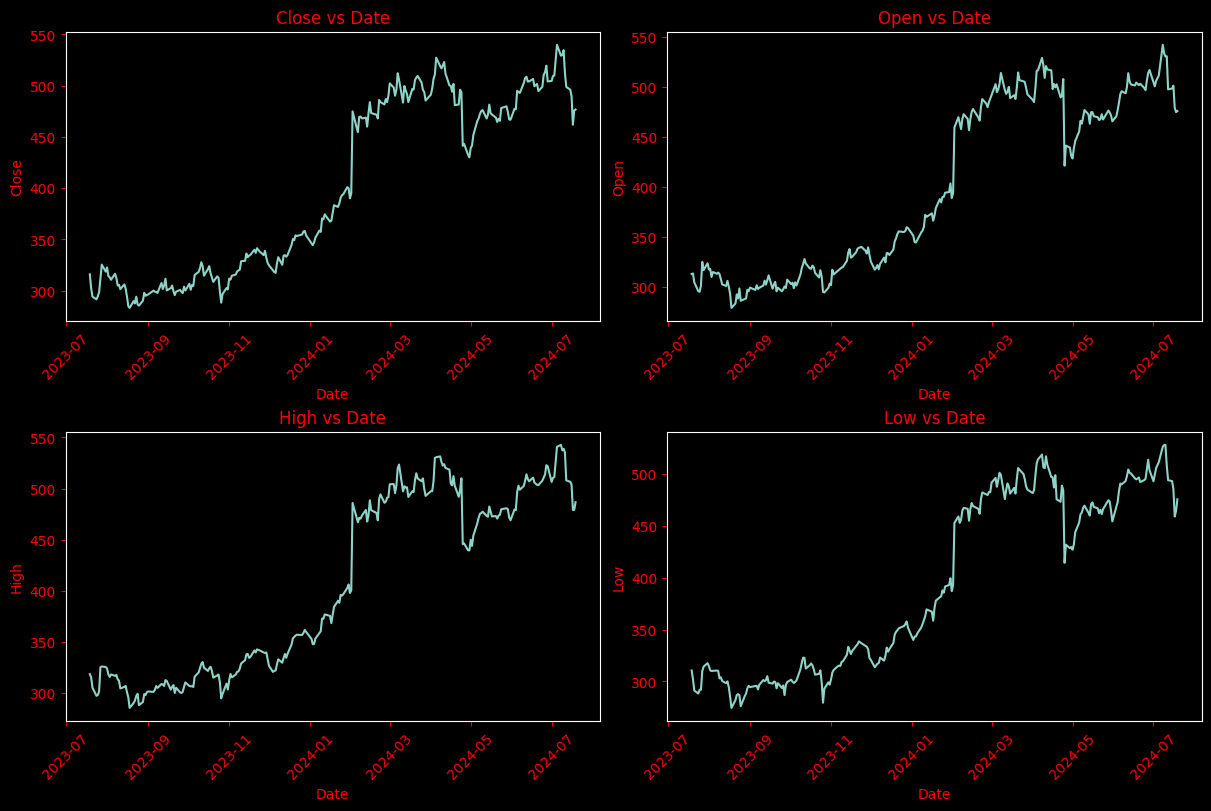

In [9]:
plt.style.use('dark_background')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), constrained_layout=True, facecolor='black')

columns = ['Close', 'Open', 'High', 'Low']
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

for col, pos in zip(columns, positions):
    ax[pos].set_facecolor('black')
    sns.lineplot(data=df, y=col, x='Date', ax=ax[pos])
    ax[pos].set_title(f"{col} vs Date", color='red')
    ax[pos].set_xlabel("Date", color='red')
    ax[pos].set_ylabel(col, color='red')
    ax[pos].tick_params(axis='x', rotation=45, colors='red')
    ax[pos].tick_params(axis='y', colors='red')
plt.show()

<Axes: >

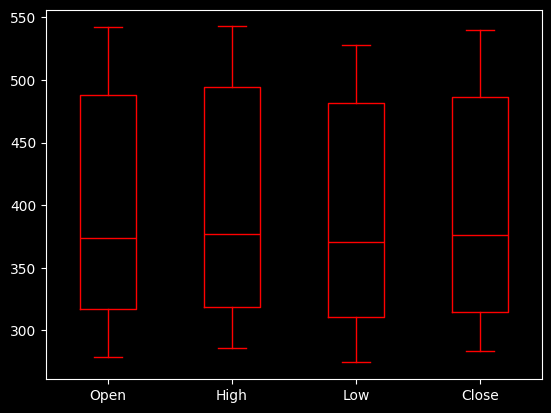

In [10]:
plt.style.use('dark_background')
df.boxplot(color='red', grid=False)


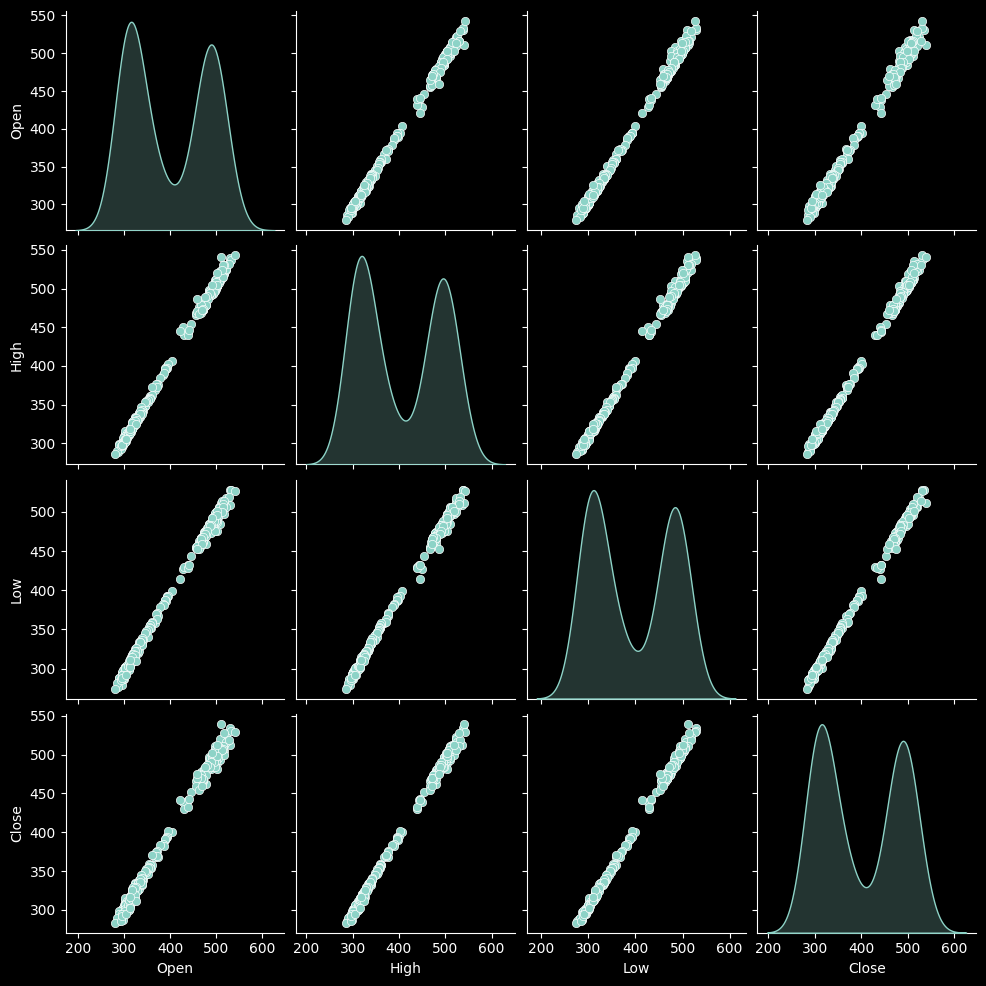

In [11]:
plt.style.use('dark_background')
sns.pairplot(data=df, diag_kind='kde')

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

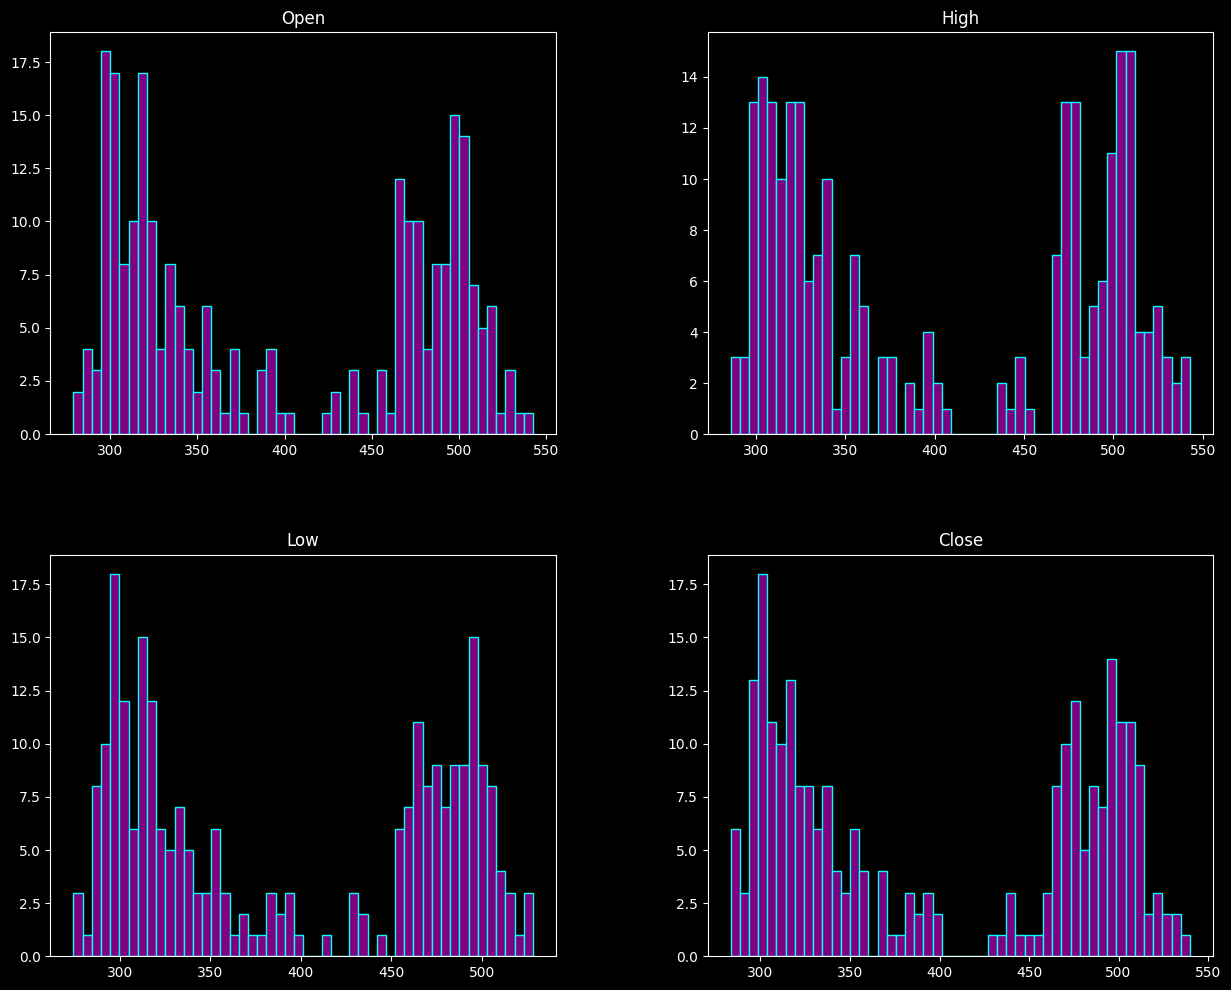

In [12]:
plt.style.use('dark_background')
df.hist(figsize=(15,12),bins=50,color='purple', edgecolor='cyan', grid=False)

<Axes: >

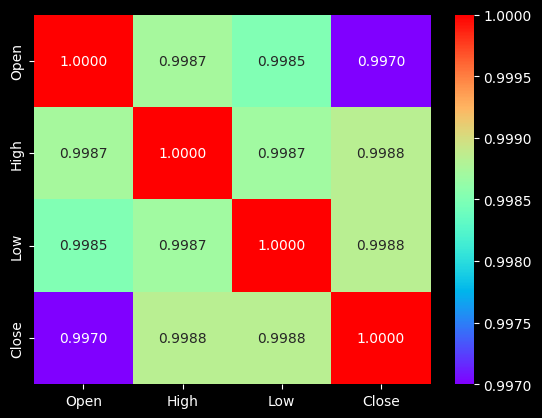

In [13]:
plt.style.use('dark_background')
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.rainbow, fmt='.4f', edgecolor='black')

In [14]:
df.describe()

,Open,High,Low,Close
count,253.000000,253.000000,253.000000,253.000000
mean,399.314901,404.474822,394.328458,399.577984
std,85.869223,86.815857,84.808426,85.861415
min,279.030000,285.690000,274.380000,283.250000
25%,316.780000,318.680000,310.650000,314.690000
50%,373.650000,377.060000,370.950000,376.130000
75%,488.170000,494.360000,481.780000,486.130000
max,542.350000,542.810000,528.360000,539.910000


<div class="alert alert-danger" role="alert"> 
🔎 DataAugmentation on Sequence Data

In [15]:
def simulate_augment_data(data, ra=[1], ma=[1], n_samples=253):
    arma_model = ArmaProcess(ra, ma)
    simulate_data = arma_model.generate_sample(nsample = n_samples)
    return data + simulate_data

In [16]:
df_simulated = df.copy()
df_simulated['Open'] = simulate_augment_data(df['Open'])
df_simulated['High'] = simulate_augment_data(df['High'])
df_simulated['Low'] = simulate_augment_data(df['Low'])
df_simulated['Close'] = simulate_augment_data(df['Close'])

df_simulated.head()

,Open,High,Low,Close
Date,,,,
2024-07-19,476.743186,486.845307,475.042690,476.283593
2024-07-18,475.795298,477.048588,466.539961,475.673305
2024-07-17,479.518321,478.231833,458.892074,461.218524
2024-07-16,502.777177,503.936633,485.264946,490.162848
2024-07-15,497.048955,509.032350,492.521759,497.212652


In [17]:
df_final = pd.concat([df, df_simulated], axis=0)
df_final

,Open,High,Low,Close
Date,,,,
2024-07-19,476.060000,486.710000,475.710000,476.790000
2024-07-18,475.000000,479.240000,464.540000,475.850000
2024-07-17,479.170000,479.170000,459.120000,461.990000
2024-07-16,501.500000,503.950000,485.790000,489.790000
2024-07-15,498.630000,506.680000,493.370000,496.160000
...,...,...,...,...
2023-07-25,295.266253,298.366684,292.778447,294.879808
2023-07-24,295.855827,297.854242,287.959516,290.308769
2023-07-21,302.828748,304.385990,291.700342,294.016814


<div class="alert alert-danger" role="alert"> 
🔎 Scalling operation on DataFrame

In [18]:
features = ['Close', 'High', 'Low', 'Open']
target = ['Close']

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(df_final[features].values)
scaled_target = scaler.fit_transform(df_final[target].values)

In [19]:
scaled_features.shape,  scaled_target.shape

((506, 4), (506, 1))

<div class="alert alert-danger" role="alert"> 
🔎 train & test split

In [20]:
train_size = int(len(scaled_features) * 0.8)

train_features, test_features = scaled_features[:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[:train_size], scaled_target[train_size:]

print(f"train features shape : {train_features.shape}")
print(f"test features shape : {test_features.shape}")
print(f"train target shape : {train_target.shape}")
print(f"test target shape : {test_target.shape}")

train features shape : (404, 4)
test features shape : (102, 4)
train target shape : (404, 1)
test target shape : (102, 1)


<div class="alert alert-danger" role="alert"> 
🔎 Window part on the adataset

In [21]:
def create_dataset(features, target, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(features) - time_steps):
        a = features[i:(i + time_steps), :]
        dataX.append(a)
        b = target[i + time_steps]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [22]:
time_step = 20

X_train, y_train = create_dataset(train_features, train_target, time_steps = time_step)
X_test, y_test = create_dataset(test_features, test_target, time_steps = time_step)

print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape : (384, 20, 4)
y_train shape : (384, 1)
X_test shape : (82, 20, 4)
y_test shape : (82, 1)


<div class="alert alert-danger" role="alert"> 
🔎 build the model

In [23]:
model_LSTM = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, activation='gelu', return_sequences=True, input_shape=(time_step, 4)),
    tf.keras.layers.LSTM(40, activation='gelu', return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [24]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 60)            15600     
                                                                 
 lstm_1 (LSTM)               (None, 40)                16160     
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 31,801
Trainable params: 31,801
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-danger" role="alert"> 
🔎 compile the model

In [25]:
model_LSTM.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])

<div class="alert alert-danger" role="alert"> 
🔎 train the model

In [26]:
history_lstm = model_LSTM.fit(X_train, y_train, epochs=700, batch_size=8, validation_data=(X_test, y_test), verbose=1)

Epoch 1/700
48/48 [==============================] - 2s 15ms/step - loss: 0.1233 - MAE: 0.2427 - val_loss: 0.0073 - val_MAE: 0.0766
Epoch 2/700
48/48 [==============================] - 0s 8ms/step - loss: 0.0197 - MAE: 0.1000 - val_loss: 0.0104 - val_MAE: 0.0946
Epoch 3/700
48/48 [==============================] - 0s 8ms/step - loss: 0.0194 - MAE: 0.0987 - val_loss: 0.0087 - val_MAE: 0.0851
Epoch 4/700
48/48 [==============================] - 0s 9ms/step - loss: 0.0171 - MAE: 0.0924 - val_loss: 0.0068 - val_MAE: 0.0737
Epoch 5/700
48/48 [==============================] - 0s 8ms/step - loss: 0.0171 - MAE: 0.0912 - val_loss: 0.0057 - val_MAE: 0.0662
Epoch 6/700
48/48 [==============================] - 0s 8ms/step - loss: 0.0148 - MAE: 0.0843 - val_loss: 0.0050 - val_MAE: 0.0614
Epoch 7/700
48/48 [==============================] - 0s 8ms/step - loss: 0.0150 - MAE: 0.0821 - val_loss: 0.0043 - val_MAE: 0.0561
Epoch 8/700
48/48 [==============================] - 0s 8ms/step - loss: 0.0136 - 

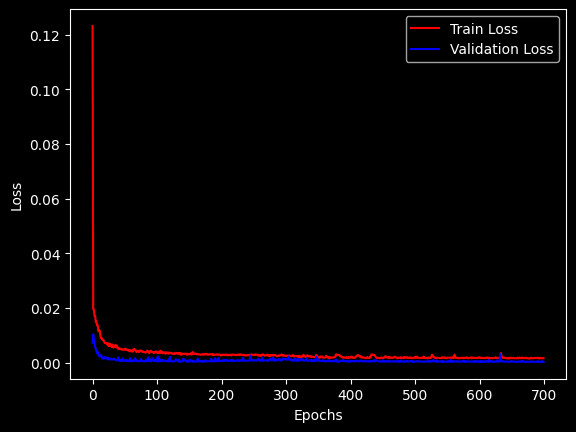

In [33]:
plt.style.use('dark_background')
plt.plot(history_lstm.history['loss'], label='Train Loss', color='r')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss', color='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()


<div class="alert alert-danger" role="alert"> 
🔎 Evaluate the model

In [28]:
y_pred = model_LSTM.predict(X_test)
y_true = y_test
y_pred = scaler.inverse_transform(y_pred)
y_true = scaler.inverse_transform(y_true)

3/3 [==============================] - 0s 5ms/step


In [29]:
MSE = metrics.mean_squared_error(y_pred, y_true)
MAE = metrics.mean_squared_error(y_pred, y_true)
r2_s = metrics.r2_score(y_pred, y_true)

In [30]:
validation = pd.DataFrame([MSE, MAE, r2_s], index=['MSE', 'MAE', 'r2_score'], columns=['val'])
validation

,val
MSE,16.750060
MAE,16.750060
r2_score,0.852894


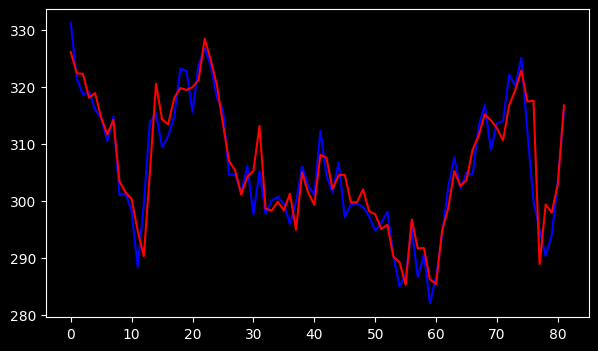

In [31]:
plt.figure(figsize = (7,4))
plt.plot(y_true, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")

<div class="alert alert-danger" role="alert"> 
🔎 predict last sequence

In [32]:
timestep = 20

last_sequence = scaled_features[-time_step:]
last_sequence = np.expand_dims(last_sequence, axis= 0)

predict = model_LSTM.predict(last_sequence)
predict = scaler.inverse_transform(predict)

print(predict)

1/1 [==============================] - 0s 24ms/step
[[474.9138]]


In [ ]:
# Armin Amani